In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import utils
utils.set_pretty_prints()

import tensorflow as tf
from tensorflow.keras.utils import plot_model

# Load dataset breast cancer

In [2]:
db = utils.load_dataset('breast_cancer')

Loading dataset 'breast_cancer' using 'load_breast_cancer' with normalize=True...
Data loaded:
  x_full     (569, 30)
  y_full     (569, 1)
  x_train    (455, 30)
  y_train    (455, 1)
  x_dev      (57, 30)
  y_dev      (57, 1)
  x_test     (57, 30)
  y_test     (57, 1)
  df         (569, 30)
  desc       ".. _breast_cancer_dataset:Breast cancer wisconsin (diagnostic) dataset---------------------------"


# Dataset exploration

In [129]:
#print description
print(db.desc)

#remember! MALign is bad 

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [39]:
#print shape of dataset
db.df.shape

(569, 30)

In [40]:
#get a feeling of dataset by printing the top 5 rows
db.df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.0787,1.0950,0.9053,8.589,153.40,0.0064,0.0490,0.0537,0.0159,0.0300,0.0062,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
1,20.57,17.77,132.90,1326.0,0.0847,0.0786,0.0869,0.0702,0.1812,0.0567,0.5435,0.7339,3.398,74.08,0.0052,0.0131,0.0186,0.0134,0.0139,0.0035,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.0890
2,19.69,21.25,130.00,1203.0,0.1096,0.1599,0.1974,0.1279,0.2069,0.0600,0.7456,0.7869,4.585,94.03,0.0062,0.0401,0.0383,0.0206,0.0225,0.0046,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.0876
3,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,0.2597,0.0974,0.4956,1.1560,3.445,27.23,0.0091,0.0746,0.0566,0.0187,0.0596,0.0092,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.1730
4,20.29,14.34,135.10,1297.0,0.1003,0.1328,0.1980,0.1043,0.1809,0.0588,0.7572,0.7813,5.438,94.44,0.0115,0.0246,0.0569,0.0188,0.0176,0.0051,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.0768


In [41]:
#what's the mean, max, min, std for each column?
db.df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.0000,569.0000,569.000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000,569.0000
mean,14.1273,19.2896,91.969,654.8891,0.0964,0.1043,0.0888,0.0489,0.1812,0.0628,0.4052,1.2169,2.8661,40.3371,0.0070,0.0255,0.0319,0.0118,0.0205,0.0038,16.2692,25.6772,107.2612,880.5831,0.1324,0.2543,0.2722,0.1146,0.2901,0.0839
std,3.5240,4.3010,24.299,351.9141,0.0141,0.0528,0.0797,0.0388,0.0274,0.0071,0.2773,0.5516,2.0219,45.4910,0.0030,0.0179,0.0302,0.0062,0.0083,0.0026,4.8332,6.1463,33.6025,569.3570,0.0228,0.1573,0.2086,0.0657,0.0619,0.0181
min,6.9810,9.7100,43.790,143.5000,0.0526,0.0194,0.0000,0.0000,0.1060,0.0500,0.1115,0.3602,0.7570,6.8020,0.0017,0.0023,0.0000,0.0000,0.0079,0.0009,7.9300,12.0200,50.4100,185.2000,0.0712,0.0273,0.0000,0.0000,0.1565,0.0550
25%,11.7000,16.1700,75.170,420.3000,0.0864,0.0649,0.0296,0.0203,0.1619,0.0577,0.2324,0.8339,1.6060,17.8500,0.0052,0.0131,0.0151,0.0076,0.0152,0.0022,13.0100,21.0800,84.1100,515.3000,0.1166,0.1472,0.1145,0.0649,0.2504,0.0715
50%,13.3700,18.8400,86.240,551.1000,0.0959,0.0926,0.0615,0.0335,0.1792,0.0615,0.3242,1.1080,2.2870,24.5300,0.0064,0.0204,0.0259,0.0109,0.0187,0.0032,14.9700,25.4100,97.6600,686.5000,0.1313,0.2119,0.2267,0.0999,0.2822,0.0800
75%,15.7800,21.8000,104.100,782.7000,0.1053,0.1304,0.1307,0.0740,0.1957,0.0661,0.4789,1.4740,3.3570,45.1900,0.0081,0.0324,0.0420,0.0147,0.0235,0.0046,18.7900,29.7200,125.4000,1084.0000,0.1460,0.3391,0.3829,0.1614,0.3179,0.0921
max,28.1100,39.2800,188.500,2501.0000,0.1634,0.3454,0.4268,0.2012,0.3040,0.0974,2.8730,4.8850,21.9800,542.2000,0.0311,0.1354,0.3960,0.0528,0.0790,0.0298,36.0400,49.5400,251.2000,4254.0000,0.2226,1.0580,1.2520,0.2910,0.6638,0.2075


In [49]:
#do we have null values in our dataset?
db.df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [50]:
#print column datatypes
db.df.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [64]:
#use info method to replace isna & dtypes
db.df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

/Users/alexandrupurdila/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


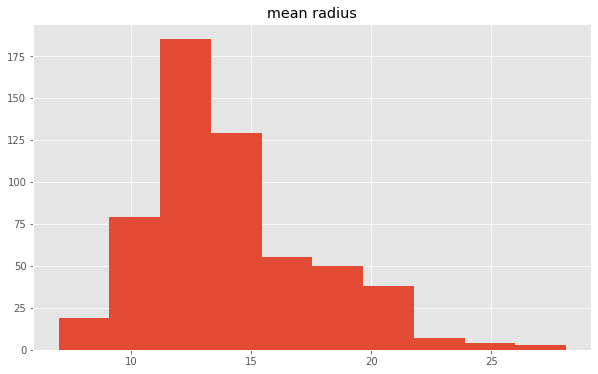

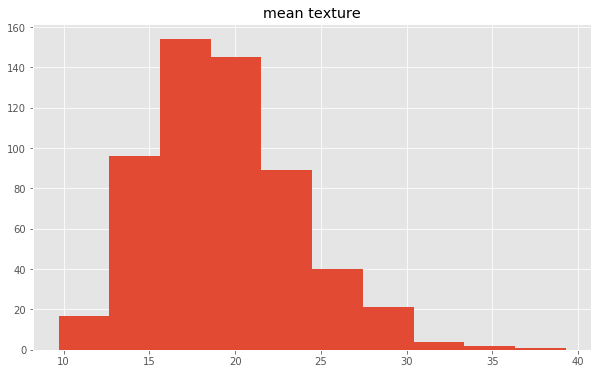

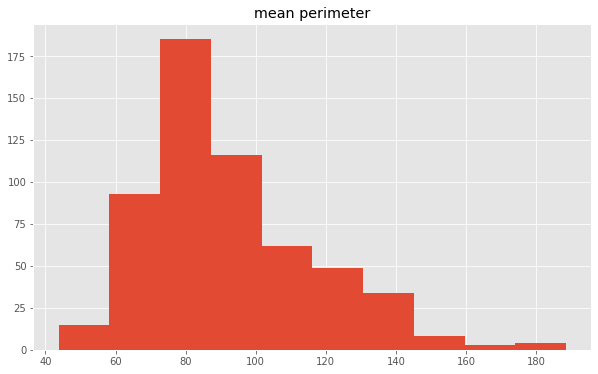

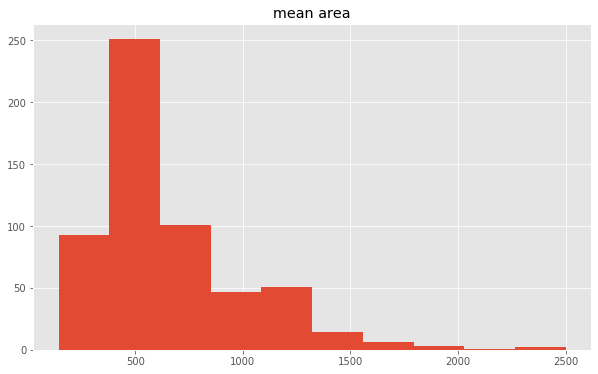

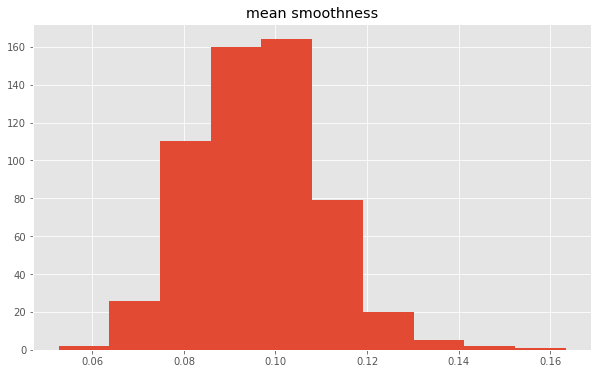

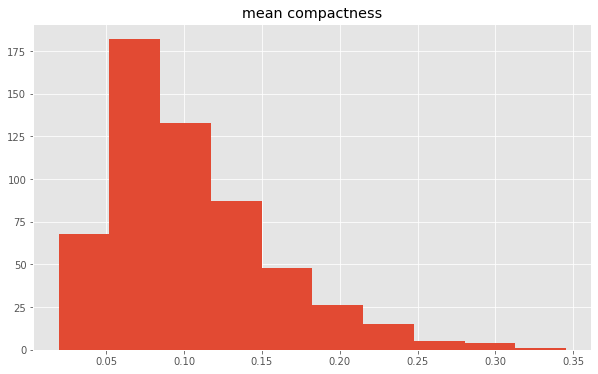

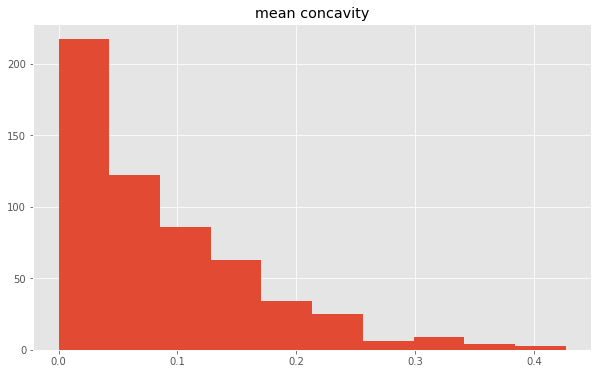

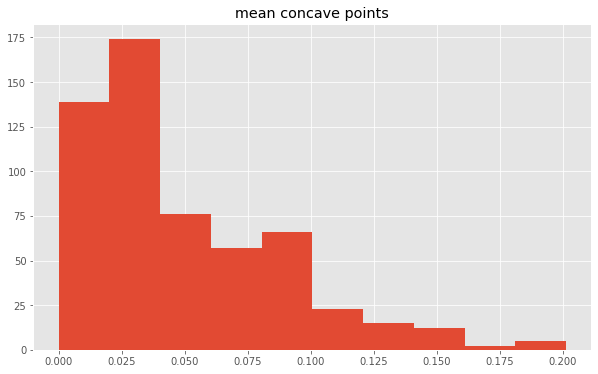

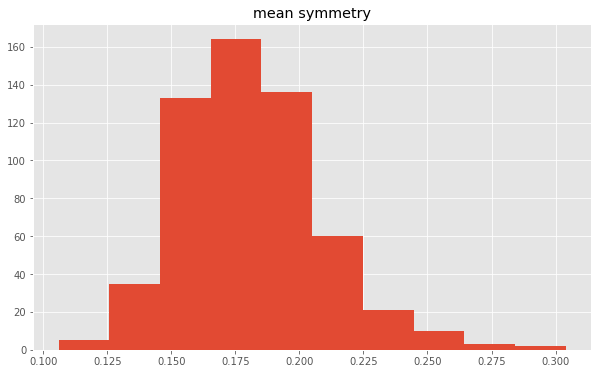

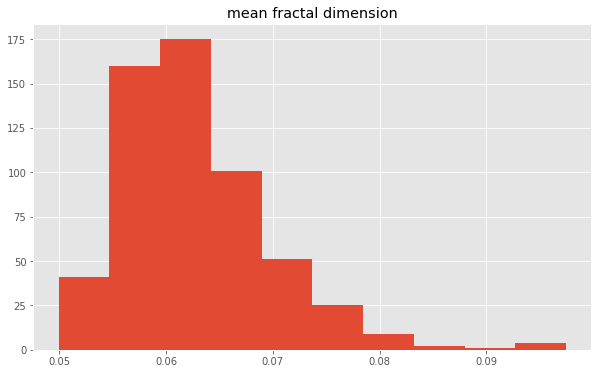

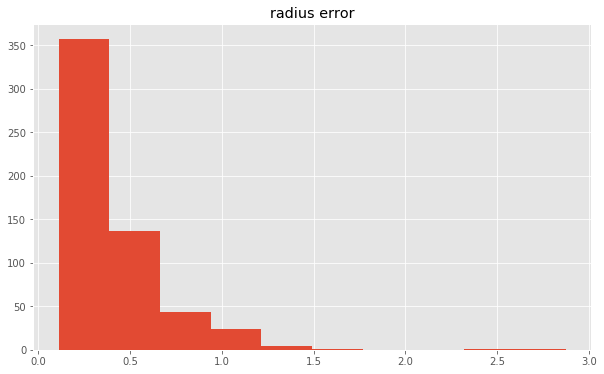

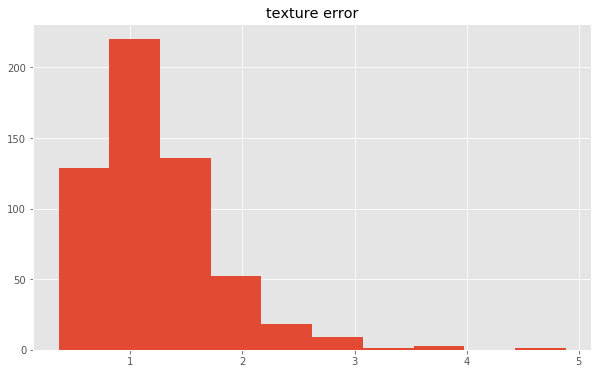

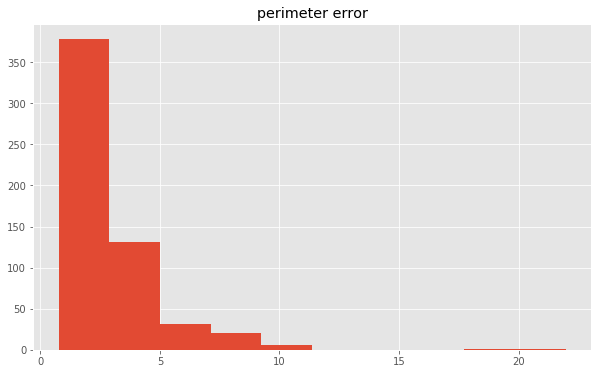

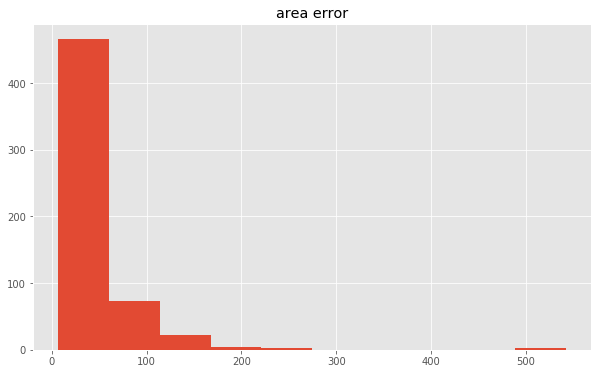

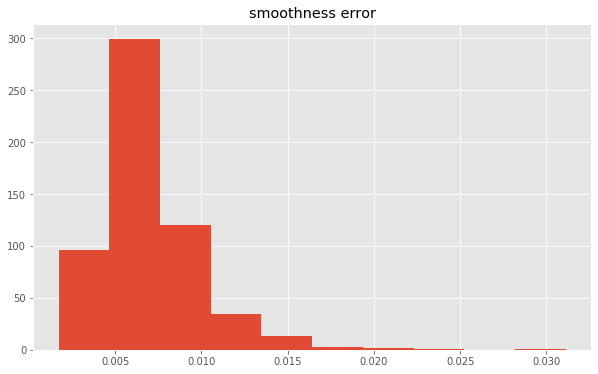

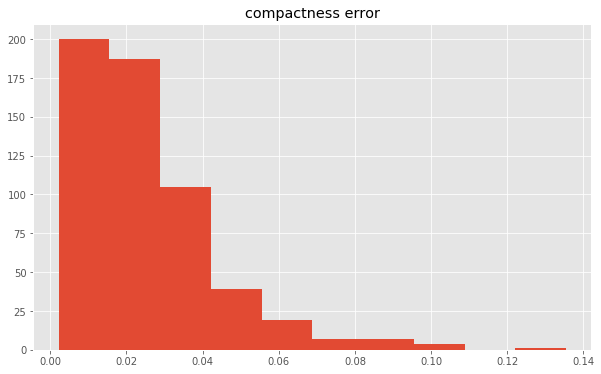

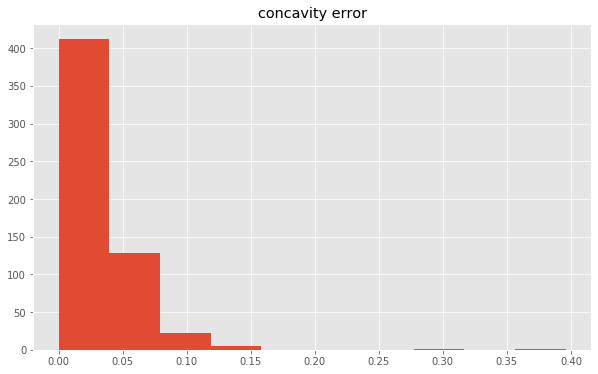

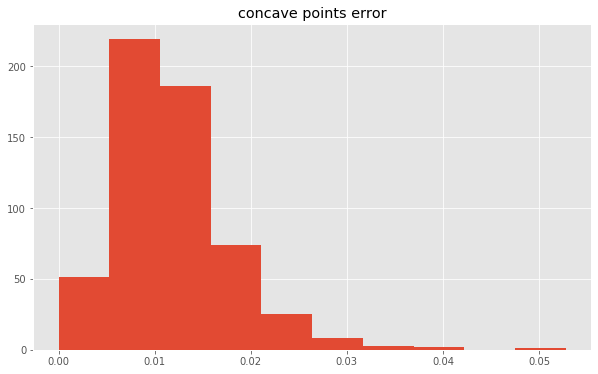

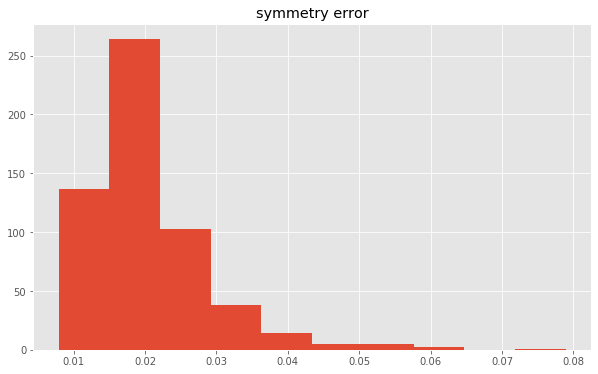

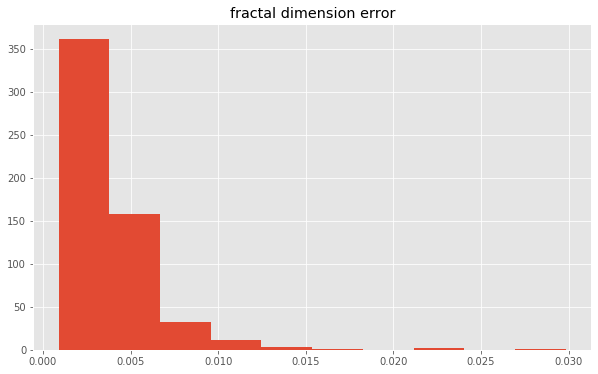

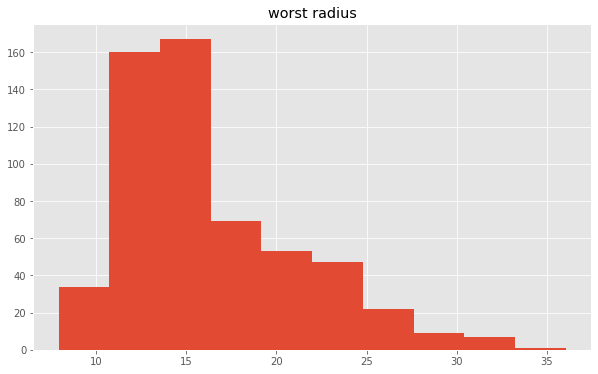

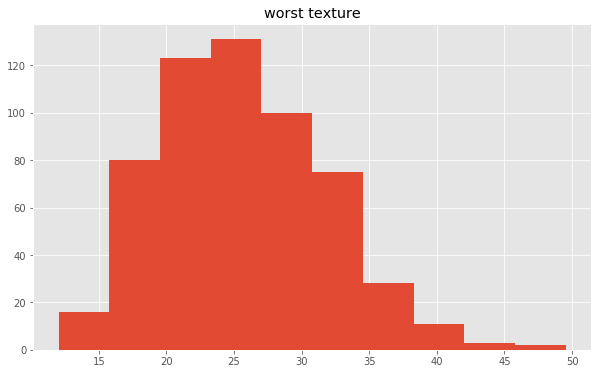

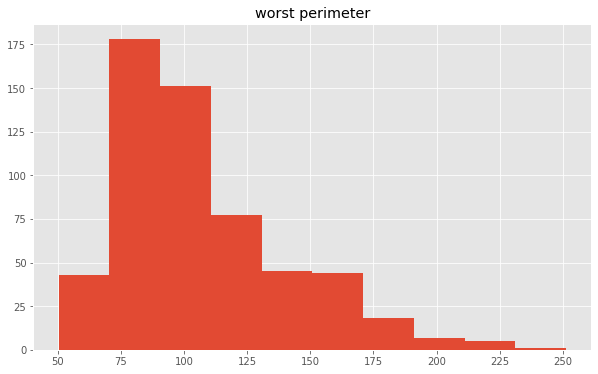

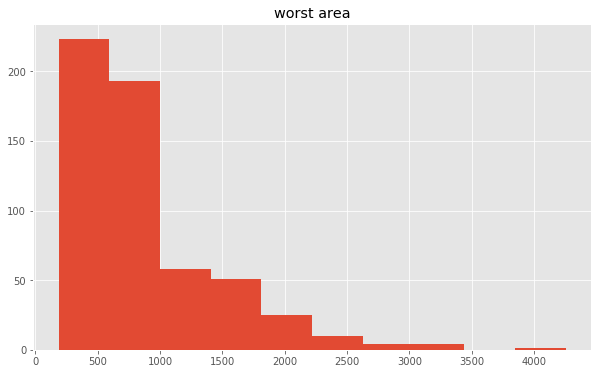

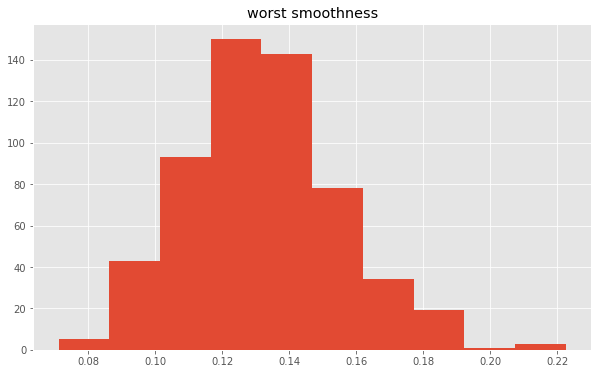

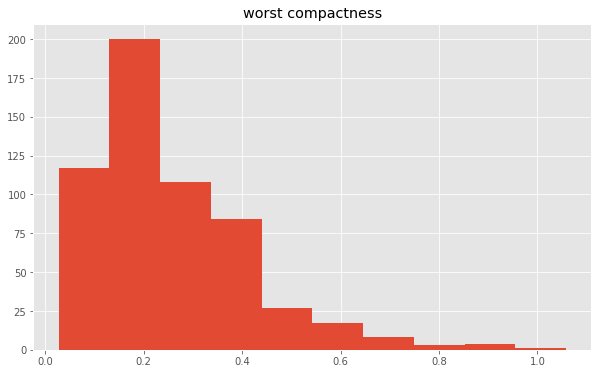

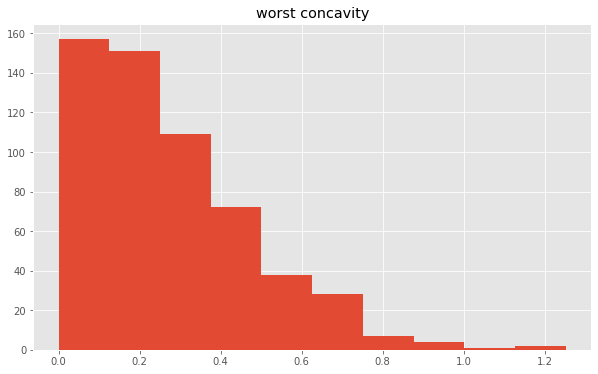

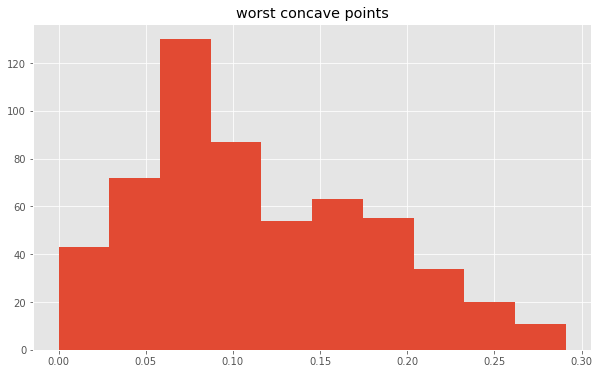

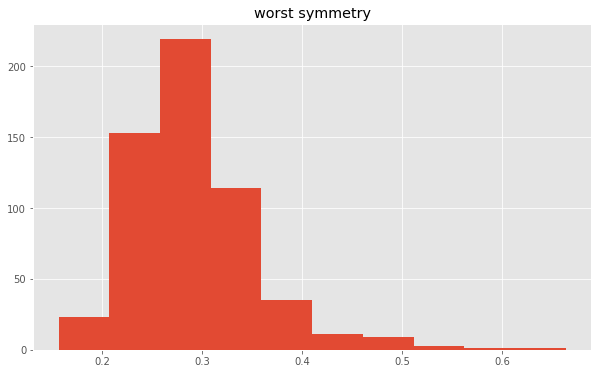

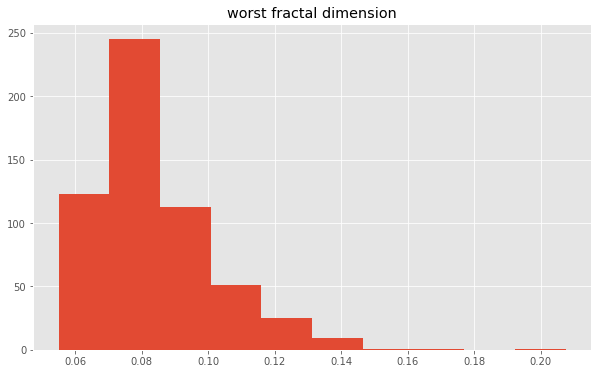

In [44]:
#let's plot the columns distributions
for column in db.df.columns:
    plt.figure(figsize=(10, 6))
    db.df[column].hist()
    plt.title('{}'.format(column))

In [235]:
#find out variable correlation
X_full = np.vstack([db.x_train, db.x_dev, db.x_test])
y_full = np.vstack([db.y_train, db.y_dev, db.y_test])
df_full = db.df.copy()
df_full['target'] = y_full
corr = df_full.corr()
corr

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.0000,0.3238,0.9979,0.9874,0.1706,0.5061,0.6768,0.8225,0.1477,-0.3116,0.6791,-0.0973,0.6742,0.7359,-0.2226,0.2060,0.1942,0.3762,-0.1043,-0.0426,0.9695,0.2970,0.9651,0.9411,0.1196,0.4135,0.5269,0.7442,0.1640,0.0071,0.0208
mean texture,0.3238,1.0000,0.3295,0.3211,-0.0234,0.2367,0.3024,0.2935,0.0714,-0.0764,0.2759,0.3864,0.2817,0.2598,0.0066,0.1920,0.1433,0.1639,0.0091,0.0545,0.3526,0.9120,0.3580,0.3435,0.0775,0.2778,0.3010,0.2953,0.1050,0.1192,0.0392
mean perimeter,0.9979,0.3295,1.0000,0.9865,0.2073,0.5569,0.7161,0.8510,0.1830,-0.2615,0.6918,-0.0868,0.6931,0.7450,-0.2027,0.2507,0.2281,0.4072,-0.0816,-0.0055,0.9695,0.3030,0.9704,0.9415,0.1505,0.4558,0.5639,0.7712,0.1891,0.0510,0.0211
mean area,0.9874,0.3211,0.9865,1.0000,0.1770,0.4985,0.6860,0.8233,0.1513,-0.2831,0.7326,-0.0663,0.7266,0.8001,-0.1668,0.2126,0.2077,0.3723,-0.0725,-0.0199,0.9627,0.2875,0.9591,0.9592,0.1235,0.3904,0.5126,0.7220,0.1436,0.0037,0.0022
mean smoothness,0.1706,-0.0234,0.2073,0.1770,1.0000,0.6591,0.5220,0.5537,0.5578,0.5848,0.3015,0.0684,0.2961,0.2466,0.3324,0.3189,0.2484,0.3807,0.2008,0.2836,0.2131,0.0361,0.2389,0.2067,0.8053,0.4725,0.4349,0.5031,0.3943,0.4993,0.0260
mean compactness,0.5061,0.2367,0.5569,0.4985,0.6591,1.0000,0.8831,0.8311,0.6026,0.5654,0.4975,0.0462,0.5489,0.4557,0.1353,0.7387,0.5705,0.6423,0.2300,0.5073,0.5353,0.2481,0.5902,0.5096,0.5655,0.8658,0.8163,0.8156,0.5102,0.6874,0.0380
mean concavity,0.6768,0.3024,0.7161,0.6860,0.5220,0.8831,1.0000,0.9214,0.5007,0.3368,0.6319,0.0762,0.6604,0.6174,0.0986,0.6703,0.6913,0.6833,0.1780,0.4493,0.6882,0.2999,0.7296,0.6760,0.4488,0.7550,0.8841,0.8613,0.4095,0.5149,0.0148
mean concave points,0.8225,0.2935,0.8510,0.8233,0.5537,0.8311,0.9214,1.0000,0.4625,0.1669,0.6980,0.0215,0.7106,0.6903,0.0277,0.4904,0.4392,0.6156,0.0954,0.2576,0.8303,0.2928,0.8559,0.8096,0.4528,0.6675,0.7524,0.9102,0.3757,0.3687,0.0164
mean symmetry,0.1477,0.0714,0.1830,0.1513,0.5578,0.6026,0.5007,0.4625,1.0000,0.4799,0.3034,0.1281,0.3139,0.2240,0.1873,0.4217,0.3426,0.3933,0.4491,0.3318,0.1857,0.0907,0.2192,0.1772,0.4267,0.4732,0.4337,0.4303,0.6998,0.4384,-0.0208
mean fractal dimension,-0.3116,-0.0764,-0.2615,-0.2831,0.5848,0.5654,0.3368,0.1669,0.4799,1.0000,0.0001,0.1642,0.0398,-0.0902,0.4020,0.5598,0.4466,0.3412,0.3450,0.6881,-0.2537,-0.0513,-0.2052,-0.2319,0.5049,0.4588,0.3462,0.1753,0.3340,0.7673,-0.0061


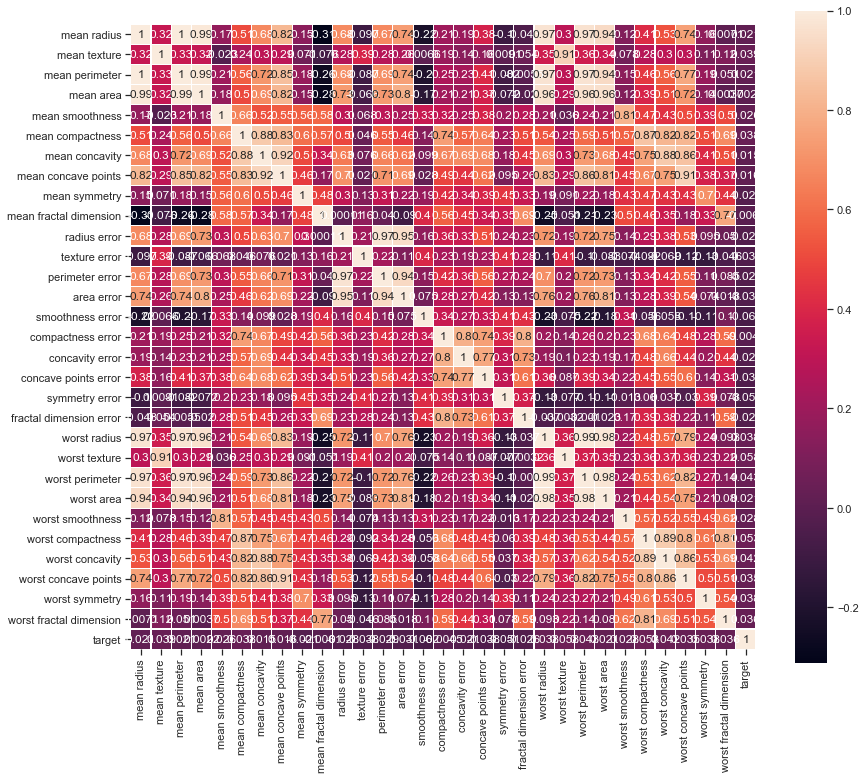

In [234]:
#correlation between data
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='ticks', color_codes=True)
plt.figure(figsize=(14, 12))
sns.heatmap(corr, linewidths=0.1, square=True, linecolor='white', annot=True)
plt.show()

[(0.0, 212), (1.0, 357)]


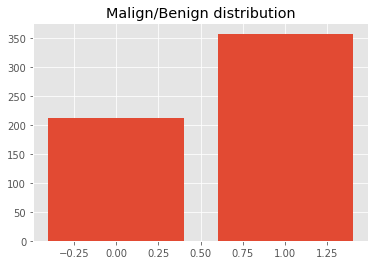

In [4]:
#how many malign/benign records do we have?
unique, counts = np.unique(y, return_counts=True)
print(list(zip(unique, counts)))
plt.figure()
plt.bar(unique, counts)
plt.title('Malign/Benign distribution')
plt.show()

In [6]:
#can we plot each datapoint?
from sklearn.manifold import TSNE
X_emb = TSNE(n_components=2).fit_transform(X)
X_emb.shape
X_emb[:2]

array([[-2.99, -4.72],
       [17.33, 22.31]], dtype=float32)

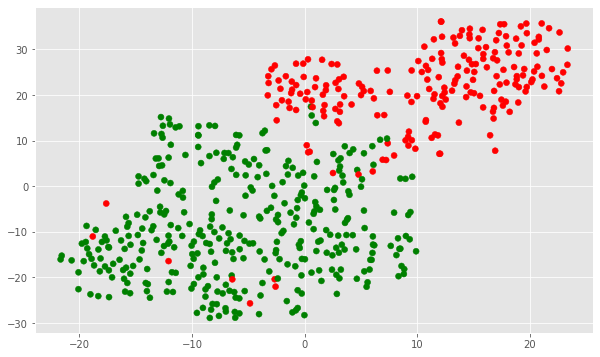

In [164]:
color = ['red' if y_crt == 0 else 'blue' for y_crt in y.ravel()]
color = np.empty(y.shape, dtype='object')
color[y == 0] = 'red'
color[y == 1] = 'green'

plt.figure(figsize=(10, 6))
plt.scatter(x=X_emb[:,0], y=X_emb[:,1], c=color.ravel())
plt.show()

# Model

# Create logistic regression model

In [144]:
nr_epochs = 500

Model: "model_175"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_177 (InputLayer)       [(None, 30)]              0         
_________________________________________________________________
dense_333 (Dense)            (None, 1)                 31        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


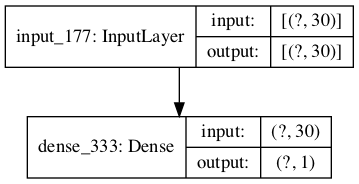

In [226]:
tf_inp = tf.keras.layers.Input(db.x_train.shape[1])
tf_out = tf.keras.layers.Dense(1, activation='sigmoid')(tf_inp)
model = tf.keras.models.Model(tf_inp, tf_out)
model.summary()
plot_model(model, show_shapes=True, to_file='model.png')

In [146]:
#compile model
model.compile(loss='binary_crossentropy', 
              optimizer='sgd', 
              metrics=['accuracy'])

In [147]:
#train model
history = model.fit(x=db.x_train,
         y=db.y_train,
         epochs=nr_epochs,
         validation_data=(db.x_dev, db.y_dev))

Train on 455 samples, validate on 57 samples
Epoch 1/500
455/455 [==============================] - 0s 894us/sample - loss: 0.4463 - acc: 0.8110 - val_loss: 0.3614 - val_acc: 0.8246
Epoch 2/500
455/455 [==============================] - 0s 47us/sample - loss: 0.3863 - acc: 0.8374 - val_loss: 0.3136 - val_acc: 0.8772
Epoch 3/500
455/455 [==============================] - 0s 43us/sample - loss: 0.3456 - acc: 0.8593 - val_loss: 0.2778 - val_acc: 0.9123
Epoch 4/500
455/455 [==============================] - 0s 44us/sample - loss: 0.3152 - acc: 0.8725 - val_loss: 0.2513 - val_acc: 0.9123
Epoch 5/500
455/455 [==============================] - 0s 45us/sample - loss: 0.2919 - acc: 0.8813 - val_loss: 0.2303 - val_acc: 0.9474
Epoch 6/500
455/455 [==============================] - 0s 46us/sample - loss: 0.2733 - acc: 0.8835 - val_loss: 0.2136 - val_acc: 0.9649
Epoch 7/500
455/455 [==============================] - 0s 42us/sample - loss: 0.2584 - acc: 0.8923 - val_loss: 0.1995 - val_acc: 0.9649
Ep

In [148]:
#evaluate model
model.evaluate(db.x_test, db.y_test)

57/57 [==============================] - 0s 44us/sample - loss: 0.0262 - acc: 1.0000


[0.02615140404617577, 1.0]

In [149]:
#understand history object
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [150]:
#basic plot method
def plot_metric(key, label):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history[key])
    plt.plot(history.history['val_{}'.format(key)])
    plt.title('Model {}'.format(key))
    plt.ylabel(label)
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Dev'], loc='upper left')
    plt.show()

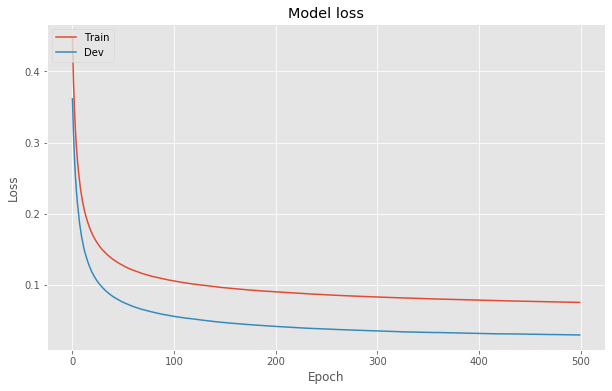

In [151]:
#plot loss
plot_metric('loss', 'Loss')

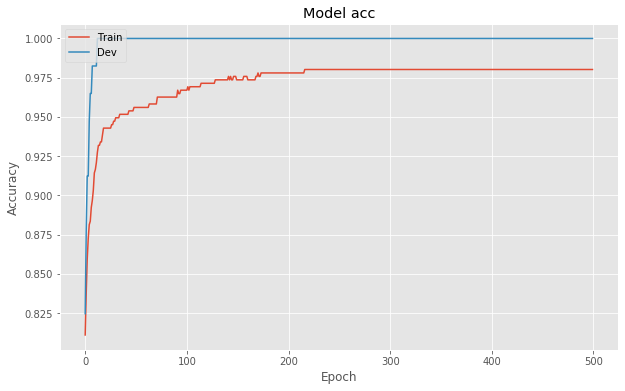

In [152]:
#plot acc
plot_metric('acc', 'Accuracy')

In [171]:
#predict train, dev, test
yhat_train = (model.predict(db.x_train) > 0.5).astype(int)
yhat_dev = (model.predict(db.x_dev) > 0.5).astype(int)
yhat_test = (model.predict(db.x_test) > 0.5).astype(int)

from sklearn.metrics import accuracy_score
acc_train = accuracy_score(db.y_train, yhat_train)
acc_dev = accuracy_score(db.y_dev, yhat_dev)
acc_test = accuracy_score(db.y_test, yhat_test)

print('Train acc: {}, dev acc: {}, test acc: {}'.format(acc_train, acc_dev, acc_test))

Train acc: 0.9802197802197802, dev acc: 1.0, test acc: 1.0


In [167]:
#Let's plot the bad predictions

In [163]:
bad_train = db.y_train != yhat_train
bad_dev = db.y_dev != yhat_dev
bad_test = db.y_test != yhat_test
arr_bad = np.vstack([bad_train, bad_dev, bad_test])
print('Number of bad predictions: {}'.format(np.sum(arr_bad)))
sum(bad_train), sum(bad_dev), sum(bad_test)

Number of bad predictions: 9


(array([9]), array([0]), array([0]))

In [165]:
color[arr_bad] = 'yellow'

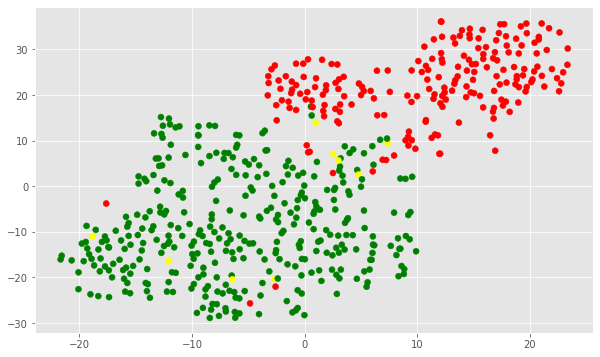

In [166]:
plt.figure(figsize=(10, 6))
plt.scatter(x=X_emb[:,0], y=X_emb[:,1], c=color.ravel())
plt.show()

# OR

In [183]:
#define dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [1]])
nr_epochs = 2000

In [187]:
#basic programming
yhat = []
for x in X:
    if sum(x) >= 1:
        yhat.append(1)
    else:
        yhat.append(0)
    #endif
#endfor
#shorter version
#(X.sum(axis=1) >= 1).astype(int)

array([0, 1, 1, 1])

In [227]:
tf_inp = tf.keras.layers.Input(2)
tf_out = tf.keras.layers.Dense(1, activation='sigmoid')(tf_inp)
model = tf.keras.models.Model(tf_inp, tf_out)
model.summary()
plot_model(model, show_shapes=True, to_file='model_or.png')
model.compile(loss='binary_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])
model.fit(x=X, y=y, epochs=nr_epochs)

Model: "model_176"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_178 (InputLayer)       [(None, 2)]               0         
_________________________________________________________________
dense_334 (Dense)            (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Train on 4 samples
Epoch 1/48
4/4 [==============================] - 1s 265ms/sample - loss: 0.7229 - acc: 0.7500
Epoch 2/48
4/4 [==============================] - 0s 844us/sample - loss: 0.7229 - acc: 0.5000
Epoch 3/48
4/4 [==============================] - 0s 614us/sample - loss: 0.7228 - acc: 0.5000
Epoch 4/48
4/4 [==============================] - 0s 549us/sample - loss: 0.7228 - acc: 0.5000
Epoch 5/48
4/4 [==============================] - 0s 582us/sample - loss: 0.7227 - acc: 0.5000
Epoch 6/48
4/4 [===============

# XOR

In [192]:
nr_epochs = 500
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

In [189]:
#basic programming
yhat = []
for x in X:
    if sum(x) == 1:
        yhat.append(1)
    else:
        yhat.append(0)
    #endif
#endfor
#shorter version
(X.sum(axis=1) == 1).astype(int)

array([0, 1, 1, 0])

In [231]:
#shallow model
nr_epochs = 100
tf_inp = tf.keras.layers.Input(X.shape[1])
tf_out = tf.keras.layers.Dense(1, activation='sigmoid')(tf_inp)
model = tf.keras.models.Model(tf_inp, tf_out)
model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
model.summary()
model.fit(x=X, y=y,
         epochs=nr_epochs,
         batch_size=1)

Model: "model_178"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_180 (InputLayer)       [(None, 2)]               0         
_________________________________________________________________
dense_336 (Dense)            (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Train on 4 samples
Epoch 1/100
4/4 [==============================] - 1s 271ms/sample - loss: 0.7647 - acc: 0.7500
Epoch 2/100
4/4 [==============================] - 0s 2ms/sample - loss: 0.7631 - acc: 0.7500
Epoch 3/100
4/4 [==============================] - 0s 3ms/sample - loss: 0.7616 - acc: 0.7500
Epoch 4/100
4/4 [==============================] - 0s 3ms/sample - loss: 0.7601 - acc: 0.7500
Epoch 5/100
4/4 [==============================] - 0s 2ms/sample - loss: 0.7587 - acc: 0.7500
Epoch 6/100
4/4 [=================

In [219]:
nr_epochs = 50
nr_trials = 10
dct_trials = {'good': 0, 'bad': 0}
for trial in range(1, nr_trials + 1):
    print('Trial {}/{}'.format(trial, nr_trials))
    tf_inp = tf.keras.layers.Input(2)
    tf_x = tf.keras.layers.Dense(8, activation='relu')(tf_inp)
    tf_out = tf.keras.layers.Dense(1, activation='sigmoid')(tf_x)

    model = tf.keras.models.Model(tf_inp, tf_out)
    opt = tf.keras.optimizers.SGD(lr=0.1)
    model.compile(loss='binary_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])
    model.fit(x=X, y=y, 
              epochs=nr_epochs,
              batch_size=1,
              verbose=0)
    yhat = model.predict(X) > 0.5
    if np.all(yhat == y):
        dct_trials['good']+= 1
    else:
        dct_trials['bad']+= 1
    #endif
    print(dct_trials)
#endfor

Trial 1/10
{'good': 0, 'bad': 1}
Trial 2/10
{'good': 1, 'bad': 1}
Trial 3/10
{'good': 1, 'bad': 2}
Trial 4/10
{'good': 2, 'bad': 2}
Trial 5/10
{'good': 2, 'bad': 3}
Trial 6/10
{'good': 2, 'bad': 4}
Trial 7/10
{'good': 2, 'bad': 5}
Trial 8/10
{'good': 3, 'bad': 5}
Trial 9/10
{'good': 3, 'bad': 6}
Trial 10/10
{'good': 3, 'bad': 7}


In [204]:
model.predict(X)

array([[0.5 ],
       [0.54],
       [0.52],
       [0.56]], dtype=float32)

In [195]:
yhat

array([[0.47],
       [0.6 ],
       [0.59],
       [0.44]], dtype=float32)

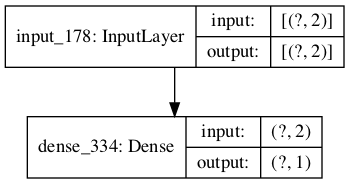

In [229]:
plot_model(model, show_shapes=True, to_file='model_xor.png')